<a href="https://colab.research.google.com/github/BrunoRaphaell/Thoughtworks_final_presentation/blob/main/English_Syllabus_delay_prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data exploration**

### **Understanding the dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BrunoRaphaell/Thoughtworks_final_presentation/main/flights.csv')

In [ ]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
df.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [ ]:
df.shape

(71175, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flight_id,71175.0,15.465135,8.649646,1.000000,8.000000,15.000000,23.000000,30.000000
arrival_time,71175.0,13.283159,4.023380,7.065594,8.939996,14.258911,16.909690,19.341235
departure_time,71175.0,16.480222,4.143705,10.065594,12.668655,16.376052,20.041281,23.341235
day,71175.0,182.000000,105.366769,0.000000,91.000000,182.000000,273.000000,364.000000
year,71175.0,2016.000000,3.741684,2010.000000,2013.000000,2016.000000,2019.000000,2022.000000
delay,71175.0,12.548378,23.125349,-41.028033,-4.412876,9.740454,27.650853,125.632352


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
airline,71175,3,BZ,47598
aircraft_type,71175,6,Airbus A320,30778
schengen,71175,2,schengen,42569
origin,71175,10,TZF,14162


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
dtype: int64

### **Graphical visualization of data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

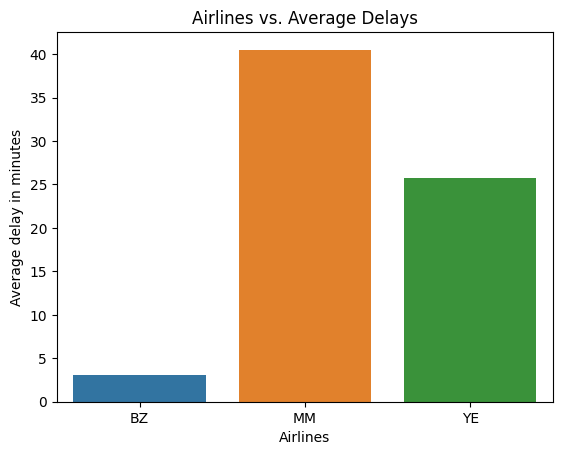

In [ ]:
# Calculate the average delay for each airline
average_delay = df.groupby('airline')['delay'].mean().reset_index()

# Plot a bar chart of the average delays
sns.barplot(x='airline', y='delay', data=average_delay)

# Add a title and labels to the axes
plt.title('Airlines vs. Average Delays')
plt.xlabel('Airlines')
plt.ylabel('Average delay in minutes')

# Show the plot
plt.show()

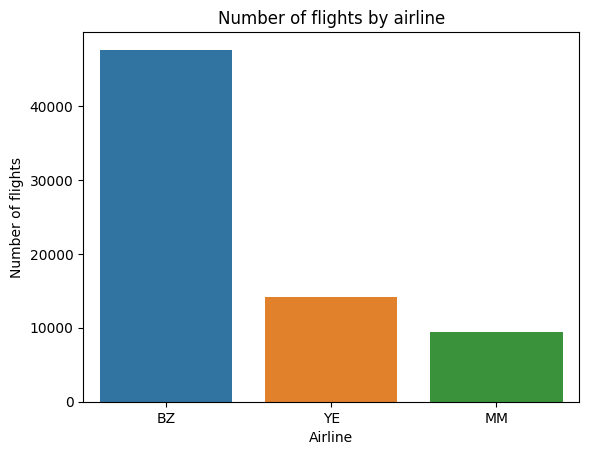

In [ ]:
# Order the airlines by the number of flights
order = df['airline'].value_counts().index

# Plot a count plot of the number of flights by airline
sns.countplot(data=df, x='airline', order=order)

# Add a title and labels to the axes
plt.title('Number of flights by airline')
plt.xlabel('Airline')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

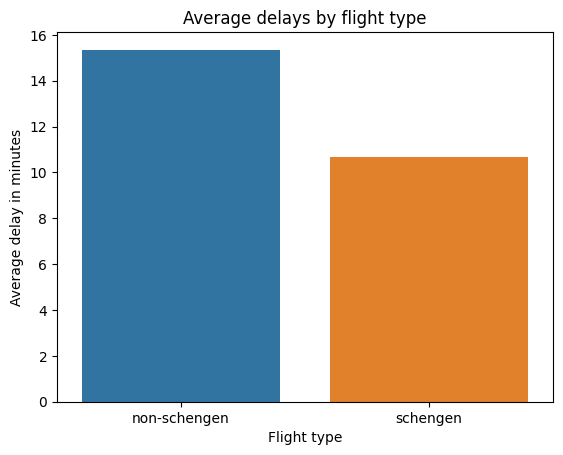

In [ ]:
# Calculate the average delay for each type of flight
average_delay_schengen = df.groupby('schengen')['delay'].mean().reset_index()

# Plot a bar chart of the average delays
sns.barplot(x='schengen', y='delay', data=average_delay_schengen)

# Add a title and labels to the axes
plt.title('Average delays by flight type')
plt.xlabel('Flight type')
plt.ylabel('Average delay in minutes')

# Show the plot
plt.show()

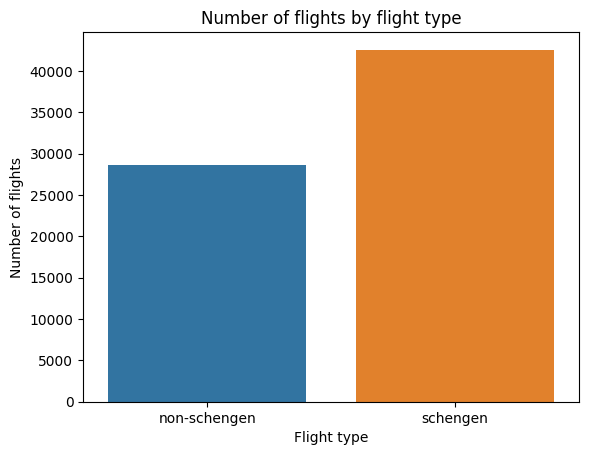

In [ ]:
# Plot a count plot of the number of flights by flight type
sns.countplot(data=df, x='schengen')

# Add a title and labels to the axes
plt.title('Number of flights by flight type')
plt.xlabel('Flight type')
plt.ylabel('Number of flights');


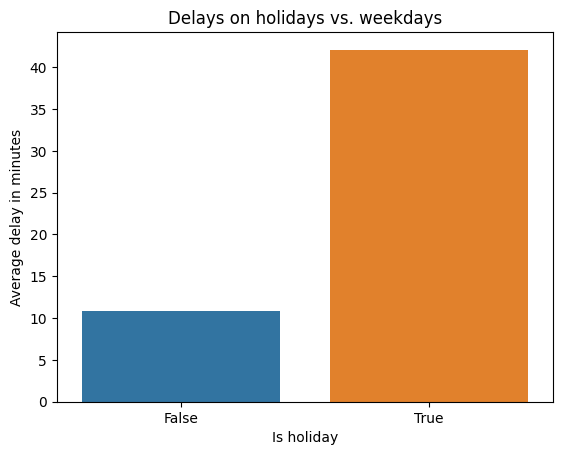

In [ ]:
# Calculate the average delay for each holiday status
average_delay_schengen = df.groupby('is_holiday')['delay'].mean().reset_index()

# Plot a bar chart of the average delays
sns.barplot(x='is_holiday', y='delay', data=average_delay_schengen)

# Add a title and labels to the axes
plt.title('Delays on holidays vs. weekdays')
plt.xlabel('Is holiday')
plt.ylabel('Average delay in minutes')

# Show the plot
plt.show()

----

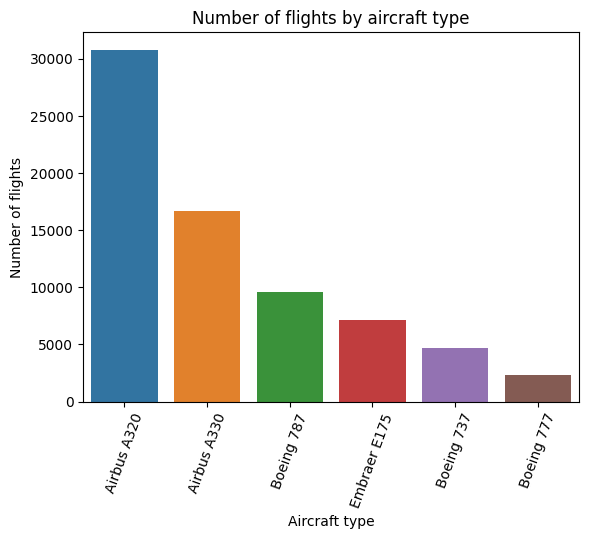

In [ ]:
# Order the aircraft types by the number of flights
order = df['aircraft_type'].value_counts().index

# Plot a count plot of the number of flights by aircraft type
sns.countplot(data=df, x='aircraft_type', order=order)

# Rotate the x-axis labels by 70 degrees
plt.xticks(rotation=70)

# Add a title and labels to the axes
plt.title('Number of flights by aircraft type')
plt.xlabel('Aircraft type')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

### Analyzing the distribution of features

In [ ]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

In [ ]:
binwidth_arrival_time = calcular_largura_bin(df, 'arrival_time')
binwidth_arrival_time

0.3846176245547029

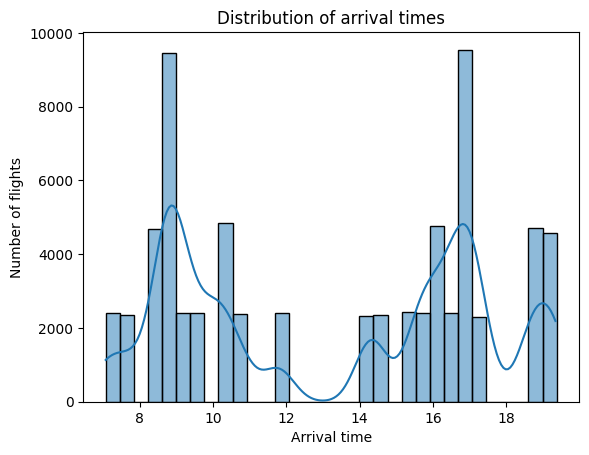

In [ ]:
# Plot a histogram of the arrival times
sns.histplot(data=df, x='arrival_time', binwidth=binwidth_arrival_time, kde=True)

# Add a title and labels to the axes
plt.title('Distribution of arrival times')
plt.xlabel('Arrival time')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

In [ ]:
binwidth_departure_time = calcular_largura_bin(df, 'departure_time')
binwidth_departure_time

0.3558030990133985

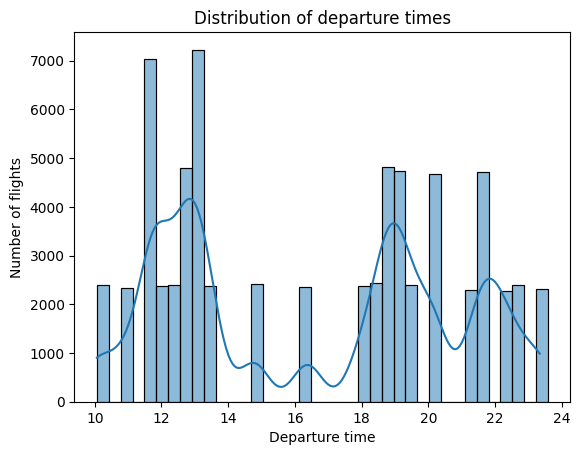

In [ ]:
# Plot a histogram of the departure times
sns.histplot(data=df, x='departure_time', binwidth=binwidth_departure_time, kde=True)

# Add a title and labels to the axes
plt.title('Distribution of departure times')
plt.xlabel('Departure time')
plt.ylabel('Number of flights')

# Show the plot
plt.show()

In [ ]:
bandwidth_delay = calcular_largura_bin(df, 'delay')
bandwidth_delay

1.5473962233165988

Fazer a verificação da escala log nesse caso e comprovar que sai de uma distribuição assimétrica a direita para uma distribuição para uma a esquerda, indicando que a transformação log não é indicada.

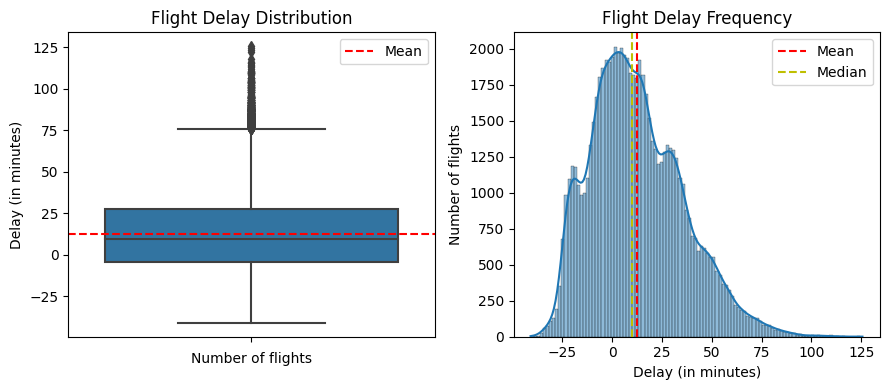

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'df' is your DataFrame and 'bandwidth_delay' is the width of the bins in the histogram

# Calculate the mean and median
mean_delay = df['delay'].mean()
median_delay = df['delay'].median()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Boxplot
sns.boxplot(data=df, y='delay', ax=axes[0])
axes[0].set_title('Flight Delay Distribution')
axes[0].set_ylabel('Delay (in minutes)')
axes[0].set_xlabel('Number of flights')

# Add lines for the mean on the boxplot
axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Mean')
axes[0].legend()

# Histogram
sns.histplot(data=df, x='delay', ax=axes[1], kde=True, binwidth=bandwidth_delay)
axes[1].set_title('Flight Delay Frequency')
axes[1].set_ylabel('Number of flights')
axes[1].set_xlabel('Delay (in minutes)')

# Add lines for the mean and median on the histogram
axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Mean')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Median')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calcule a média e a mediana
print(f"Mean: {mean_delay:.2f}")
print(f"Median: {median_delay:.2f}")

Mean: 12.55
Median: 9.74


## **Data preprocessing**

### **Feature engineering**

In [ ]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [ ]:
# Criando uma coluna de datas
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + (df['day'] + 1).astype(str), format='%Y-%j')

# Verificando se é final de semana
df['is_weekend'] = df['date'].dt.weekday.isin([5, 6])

df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True


In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_of_week
40856,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,168,2017,False,14.593600,2017-06-18,True,Sunday
51183,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,127,2019,False,9.943036,2019-05-08,False,Wednesday
14820,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,258,2012,False,47.500863,2012-09-15,True,Saturday
5088,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,339,2010,False,30.829349,2010-12-06,False,Monday
29089,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,114,2015,False,-23.937076,2015-04-25,True,Saturday


### **Feature Encoding**

In [ ]:
df['schengen'] = df['schengen'].replace({'non-schengen': 0, 'schengen': 1})
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['is_weekend'] = df['is_weekend'].replace({False: 0, True: 1})

In [ ]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_of_week
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [ ]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


### **Cleaning the Data**

In [ ]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## **Model selection and validation**

### **Training DummyRegressor**

In [ ]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [ ]:
X.head()

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,...,origin_TCY,origin_TZF,origin_ZQO,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,8.885071,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    70.205981
1    38.484609
2     2.388305
3    19.138491
4    15.016271
Name: delay, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.dummy import DummyRegressor

# Training the model
model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

# Predictions
y_pred_dummy = model_dummy.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_regression_metrics(y_test, y_pred):
    """
    Calculates and returns a dictionary with the common regression metrics.

    Parameters:
    y_test (array-like): The true target values
    y_pred (array-like): The predicted target values

    Returns:
    dict: A dictionary containing the Root Mean Squared Error,
          the Mean Absolute Error, and the R2 score.
    """
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics = {
        'Root Mean Squared Error': round(rmse, 4),
        'Mean Absolute Error': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metrics



In [ ]:
calculate_regression_metrics(y_test, y_pred_dummy)

{'Root Mean Squared Error': 23.2124,
 'Mean Absolute Error': 18.625,
 'R2 Score': -0.0001}

### **Training the RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

In [ ]:
calculate_regression_metrics(y_test, y_pred_rf)

{'Root Mean Squared Error': 13.315,
 'Mean Absolute Error': 10.6611,
 'R2 Score': 0.6709}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


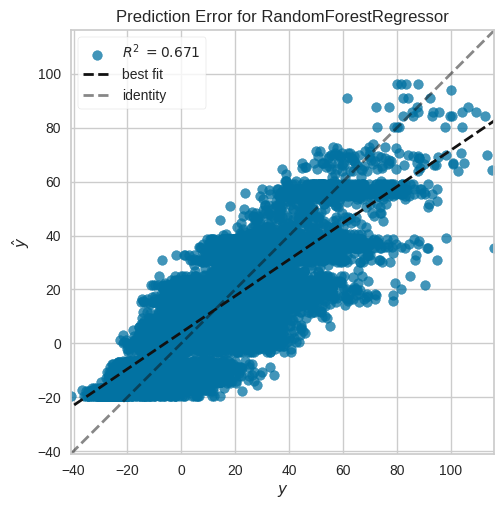

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


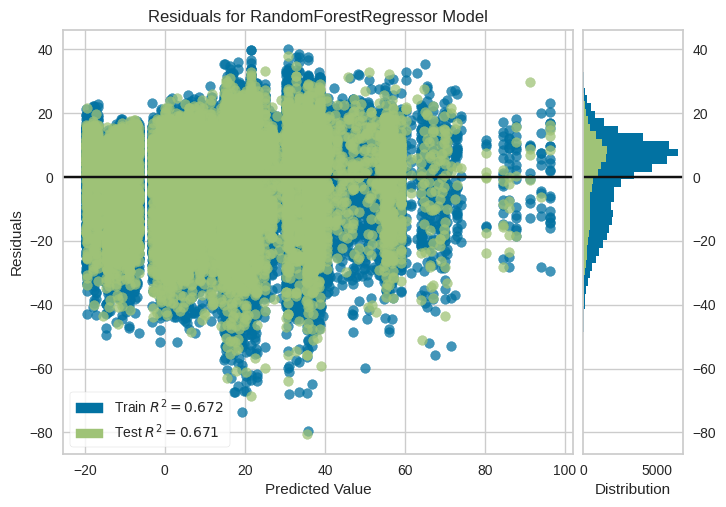

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

### **Using cross-validation**

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining evaluation metrics
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and calculating metrics
cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)

# Iterating over each metric
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.4f}".format(scores.mean())
    std_score = "{:.4f}".format(scores.std())

    # Printing evaluation metrics and standard deviation
    print(f"{metric.upper()} Scores: {[f'{val:.4f}' for val in scores]}")
    print(f"{metric.upper()} Mean: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-10.7679', '-10.6977', '-10.6891', '-10.7033', '-10.7597']
MAE Mean: -10.7235, Std: 0.0333
----------------------------------------------------------------
RMSE Scores: ['-13.4049', '-13.2787', '-13.2215', '-13.4659', '-13.4199']
RMSE Mean: -13.3582, Std: 0.0923
----------------------------------------------------------------
R2 Scores: ['0.6640', '0.6643', '0.6646', '0.6671', '0.6680']
R2 Mean: 0.6656, Std: 0.0017
----------------------------------------------------------------


## **Hyperparameter optimization**

### **Feature selection**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


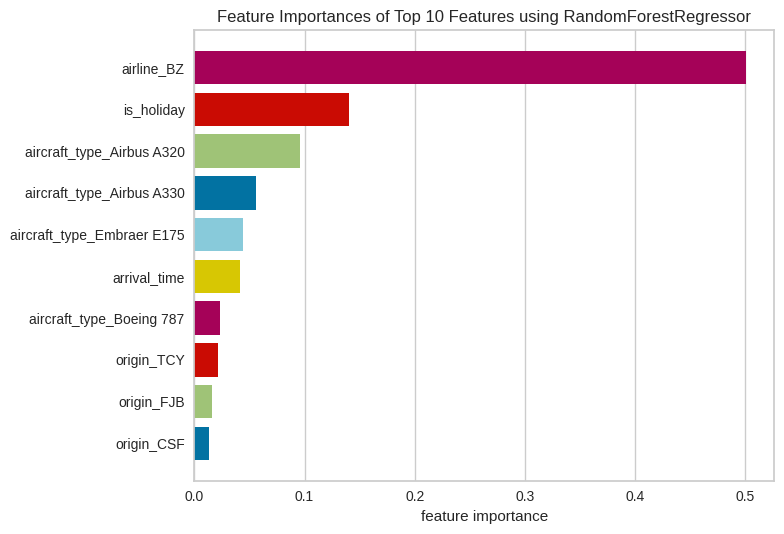

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# Getting feature importance
importances = model_rf.feature_importances_

# Creating a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances

,Feature,Importance
4,airline_BZ,0.500938
2,is_holiday,0.140530
7,aircraft_type_Airbus A320,0.096216
8,aircraft_type_Airbus A330,0.055833
12,aircraft_type_Embraer E175,0.043921
1,arrival_time,0.041862
11,aircraft_type_Boeing 787,0.023405
20,origin_TCY,0.021659
17,origin_FJB,0.015708
15,origin_CSF,0.013266


In [ ]:
# DataFrame to store the results
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42)

for count in range(1, 11):
    # Selecting the top features
    selected_features = feature_importances['Feature'].values[:count]

    # Filtering the original DataFrame columns with the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Training the model_selected_features with the selected top features only
    model_selected_features.fit(X_train_selected, y_train)

    # Making predictions
    y_pred = model_selected_features.predict(X_test_selected)

    # Calculating evaluation metrics using the function
    metricas = calculate_regression_metrics(y_test, y_pred)

    # Storing the results in the DataFrame
    results_df[count] = list(metricas.values())

# DataFrame with the results
results_df

,1,2,3,4,5,6,7,8,9,10
RMSE,18.8295,17.4588,15.9347,15.6213,15.2135,13.3275,13.3275,13.3275,13.3275,13.3275
MAE,14.9740,14.0010,12.9025,12.4938,12.1050,10.7157,10.7157,10.7157,10.7157,10.7157
R2,0.3419,0.4342,0.5287,0.5471,0.5704,0.6703,0.6703,0.6703,0.6703,0.6703


In [ ]:
model_selected_features

RandomForestRegressor(random_state=42)

In [ ]:
# Selecting the top features
selected_features = feature_importances['Feature'].values[:6]

# Filtering the original DataFrame columns with the selected features
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time
0,0,0,1,0,0,8.885071
1,0,0,1,0,0,8.939996
2,1,0,0,0,1,18.635384
3,1,0,0,1,0,15.967963
4,1,0,0,1,0,16.571894
...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384
71171,1,1,0,1,0,16.718722
71172,0,1,0,0,0,8.564949
71173,1,1,1,0,0,9.344097


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features,
                                                    y, test_size=0.2,
                                                    random_state=42)

### **Optimizing hyperparameters with GridSearchCV**

In [ ]:
param_grid = {
 'max_depth': [None, 10, 25],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be optimized
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)

CPU times: user 6min 53s, sys: 805 ms, total: 6min 54s
Wall time: 7min 4s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 25],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
results = pd.DataFrame(model_grid.cv_results_).sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
40,1.693533,0.292547,0.201964,0.024537,10,2,4,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
46,2.207043,1.201494,0.196724,0.011908,10,3,2,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
37,1.732592,0.319272,0.196164,0.016257,10,2,2,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
34,1.645277,0.419938,0.186825,0.002909,10,1,6,150,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1
49,1.329798,0.006475,0.185627,0.000348,10,3,4,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.671843,0.661212,0.665925,0.666327,0.004349,1


In [ ]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
# Print the mean and standard deviation of the R2 scores, rounded to 3 decimal places

print("Mean R2:", f"{results['mean_test_score'].mean():.3f} +/- {results['std_test_score'].mean():.3f}")


Mean R2: 0.666 +/- 0.004


In [ ]:
model_tunned = model_grid.best_estimator_

# Making predictions
y_pred_model_tunned = model_tunned.predict(X_test)

# Calculating evaluation metrics using the function
metricas_model_tunned = calculate_regression_metrics(y_test, y_pred_model_tunned)
metricas_model_tunned

{'Root Mean Squared Error': 13.3278,
 'Mean Absolute Error': 10.7161,
 'R2 Score': 0.6703}

In [ ]:
results_df['model_tunned'] = list(metricas_model_tunned.values())
results_df

,1,2,3,4,5,6,7,8,9,10,model_tunned
RMSE,18.8295,17.4588,15.9347,15.6213,15.2135,13.3275,13.3275,13.3275,13.3275,13.3275,13.3278
MAE,14.9740,14.0010,12.9025,12.4938,12.1050,10.7157,10.7157,10.7157,10.7157,10.7157,10.7161
R2,0.3419,0.4342,0.5287,0.5471,0.5704,0.6703,0.6703,0.6703,0.6703,0.6703,0.6703


### Saving the model


In [ ]:
# Import the pickle library

import pickle

# Define the file path

file_path = './production_model.pkl'

# Try to save the model
try:
    # Open the file in binary mode
    with open(file_path, 'wb') as file:
        # Save the model to the file
        pickle.dump(model_tunned, file)
    print("Model saved successfully!")
except Exception as e:
    # Print an error message
    print("An error occurred while saving the model:", str(e))


Model saved successfully!
